<a href="https://colab.research.google.com/github/lathamithu/Techvolt-Intern/blob/master/Day_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CANCER DATASET - RANDOM FOREST**

The breast cancer dataset is a classic and very easy binary classification dataset.

Classes : 2 Samples per class class : 212 (malignant), 357(Benign) samples

Total : 559

Dimensionality : 30

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [9]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [10]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [12]:
x_trainc, x_testc, y_trainc, y_testc = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 1, max_depth = 3)
classifier.fit(x_trainc, y_trainc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [17]:
y_pred = classifier.predict(x_testc)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_testc, y_pred))

print(classification_report(y_testc, y_pred))

print(accuracy_score(y_testc, y_pred))

[[45  2]
 [ 1 66]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

0.9736842105263158


In [19]:
# Feature Selection in Random Forest Algorithm model

feature_imp = pd.Series(classifier.feature_importances_, index = cancer_df.columns).sort_values(ascending = False)

In [20]:
feature_imp

worst area                 0.197794
worst radius               0.133220
mean perimeter             0.132510
worst perimeter            0.114299
mean concave points        0.100195
mean concavity             0.086496
worst concave points       0.085238
worst texture              0.021391
worst concavity            0.021361
worst compactness          0.020789
worst smoothness           0.011764
texture error              0.011265
mean compactness           0.010290
mean area                  0.007090
area error                 0.006771
mean radius                0.006069
worst symmetry             0.005276
mean symmetry              0.004747
worst fractal dimension    0.004517
mean texture               0.004124
perimeter error            0.003504
concave points error       0.002520
mean smoothness            0.002518
fractal dimension error    0.002025
concavity error            0.001772
symmetry error             0.001241
smoothness error           0.000676
radius error               0

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


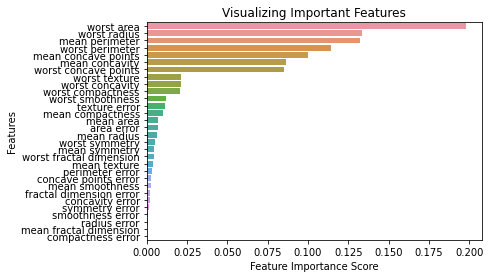

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

In [22]:
from sklearn.feature_selection import SelectFromModel
feat_sel = SelectFromModel(classifier, threshold = 0.1)
feat_sel.fit(x_trainc, y_trainc)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=3,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=20, n_jobs=None,
                                                 oob_score=False,
                                                 ran

In [23]:
# With the help of the 'tranform' method, we will pick up the important features and store them in new variable
# test objects

X_imp_train = feat_sel.transform(x_trainc)
X_imp_test = feat_sel.transform(x_testc)

In [24]:
clf_imp = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 1, max_depth = 7)
clf_imp.fit(X_imp_train, y_trainc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [25]:
# Let's see the accuracy result of the old model

y_pred = classifier.predict(x_testc)
accuracy_score(y_testc, y_pred)

0.9736842105263158

In [26]:
# Let's see the accuracy result of the new model after feature selection

y_imp_pred = clf_imp.predict(X_imp_test)
accuracy_score(y_testc, y_imp_pred)

0.9473684210526315